# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [12]:
latitude_coordinates = (-60, 60)
longitude_coordinates = (-180, 180)

cities = []
coordinates = []

lats = np.random.uniform(latitude_coordinates[0], latitude_coordinates[1], size=1100)
lons = np.random.uniform(longitude_coordinates[0], longitude_coordinates[1], size=1100)
coordinates = zip(lats, lons)

for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    if city not in cities:
        cities.append(city)


In [15]:
cities_test = pd.DataFrame(cities).nunique()
cities_test

0    569
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#config information 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="


In [16]:
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

city_list = []
#run loop & print data request for all cities from random list
counter = 0

for city in cities:
    
    response=requests.get(query + city).json()
    
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        city_list.append(city)
        
        counter += 1
        
        print(f"Processing Records {counter} | {city}")
        
    except:
        print("City not found Skipped")

Processing Records 1 | albany
Processing Records 2 | avarua
Processing Records 3 | baglan
City not found Skipped
Processing Records 4 | provideniya
Processing Records 5 | hasaki
Processing Records 6 | brookhaven
Processing Records 7 | plaridel
Processing Records 8 | saint-philippe
Processing Records 9 | kodiak
Processing Records 10 | souillac
Processing Records 11 | vallenar
Processing Records 12 | nioro
Processing Records 13 | vao
City not found Skipped
City not found Skipped
Processing Records 14 | quballat
Processing Records 15 | sao filipe
Processing Records 16 | natchitoches
Processing Records 17 | binzhou
Processing Records 18 | arraial do cabo
Processing Records 19 | atuona
Processing Records 20 | hilo
Processing Records 21 | pisco
Processing Records 22 | fortuna
Processing Records 23 | henties bay
Processing Records 24 | saint-joseph
Processing Records 25 | bandarbeyla
Processing Records 26 | bethel
Processing Records 27 | east london
Processing Records 28 | dingle
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_weather_df = pd.DataFrame({'City': city_list,
                       'Country': country,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})


#export to csv
output_df = "/Users/chipampe/Desktop/python api - homework/cities.csv"
city_weather_df.to_csv(output_df, index=False, header=True)

city_weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,albany,US,42.6001,-73.9662,80.15,69,5,1.95,1627395208
1,avarua,CK,-21.2078,-159.7750,69.85,94,75,2.30,1627395209
2,baglan,AF,36.1307,68.7083,98.82,15,0,9.82,1627395211
3,provideniya,RU,64.3833,-173.3000,46.92,99,100,9.86,1627395211
4,hasaki,JP,35.7333,140.8333,73.80,73,80,13.38,1627395037
...,...,...,...,...,...,...,...,...,...
532,alvaraes,BR,-3.2208,-64.8042,82.27,53,59,1.59,1627395729
533,thinadhoo,MV,0.5333,72.9333,82.38,71,29,5.17,1627395730
534,aketi,CD,2.7388,23.7833,80.78,60,100,2.80,1627395731
535,ballina,AU,-28.8667,153.5667,50.77,75,0,9.53,1627395732


In [18]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,13.721042,17.403017,74.566276,65.143389,49.681564,8.713538,1.627395e+09
std,30.134369,88.357272,13.283289,24.064898,40.214735,6.086871,1.660000e+02
min,-54.800000,-175.200000,35.260000,4.000000,0.000000,0.000000,1.627395e+09
25%,-11.096400,-61.348500,66.870000,51.000000,4.000000,4.050000,1.627395e+09
50%,17.881500,21.889200,76.840000,72.000000,48.000000,7.520000,1.627395e+09
75%,40.602000,94.390000,82.450000,84.000000,92.000000,11.900000,1.627396e+09
max,65.614500,179.316700,115.250000,100.000000,100.000000,33.380000,1.627396e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100% .
#city_weather_df.drop(city_weather_df[city_weather_df['Humidity'] > 100].index, inplace = True)
#note - no city has humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

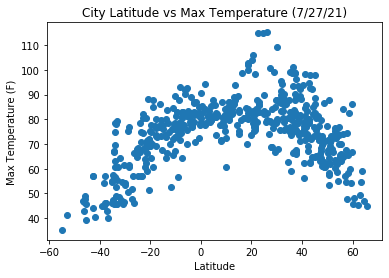

In [19]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (7/27/21)")
plt.show()

## Latitude vs. Humidity Plot

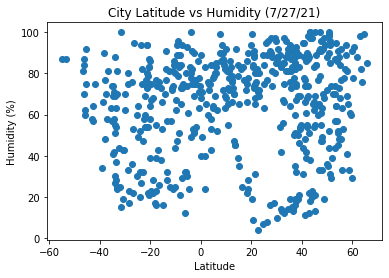

In [20]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (7/27/21)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (7/27/21)")
plt.show()

## Latitude vs. Cloudiness Plot

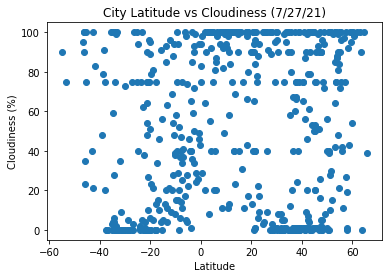

In [21]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (7/27/21)")
plt.show()

## Latitude vs. Wind Speed Plot

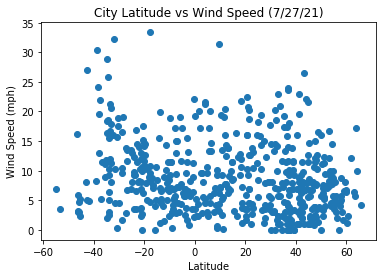

In [22]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (7/27/21)")
plt.show()

## Linear Regression

In [25]:
northern_hemi= city_weather_df.loc[city_weather_df['Lat'] >= 0]
southern_hemi = city_weather_df.loc[city_weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.4880815282821797


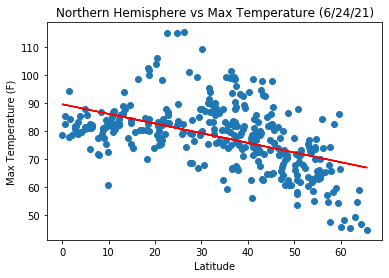

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi["Lat"],northern_hemi["Max Temp"])
regress_values = northern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemi["Lat"],northern_hemi["Max Temp"] )
plt.plot(northern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere vs Max Temperature (7/27/21)")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8025762006941181


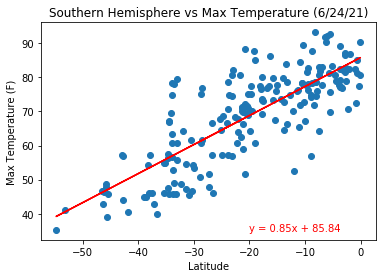

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi["Lat"],southern_hemi["Max Temp"])
regress_values = southern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemi["Lat"],southern_hemi["Max Temp"] )
plt.plot(southern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere vs Max Temperature (7/27/21)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.026340174217763437


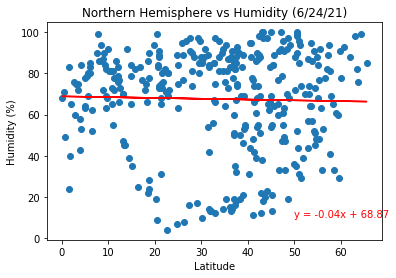

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi["Lat"],northern_hemi["Humidity"])
regress_values = northern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemi["Lat"],northern_hemi["Humidity"] )
plt.plot(northern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere vs Humidity (7/27/21)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07443848454420582


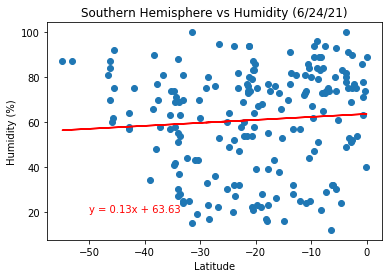

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi["Lat"],southern_hemi["Humidity"])
regress_values = southern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemi["Lat"],southern_hemi["Humidity"] )
plt.plot(southern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere vs Humidity (7/27/21)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.16146328817872402


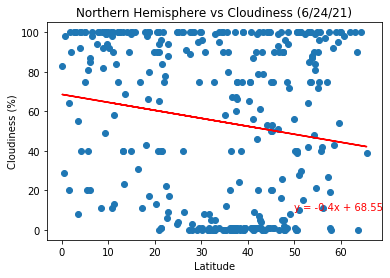

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi["Lat"],northern_hemi["Cloudiness"])
regress_values = northern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemi["Lat"],northern_hemi["Cloudiness"] )
plt.plot(northern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere vs Cloudiness (7/27/21)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03467438047843509


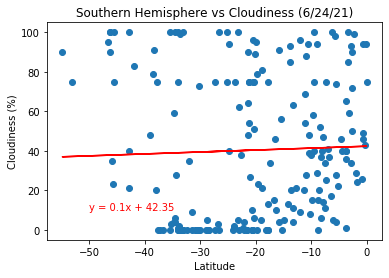

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi["Lat"],southern_hemi["Cloudiness"])
regress_values = southern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemi["Lat"],southern_hemi["Cloudiness"] )
plt.plot(southern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere vs Cloudiness ")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.174170929402717


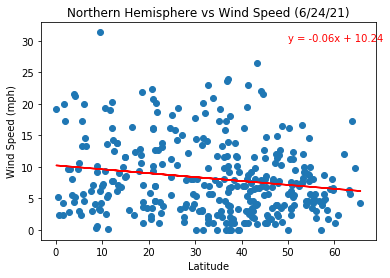

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi["Lat"],northern_hemi["Wind Speed"])
regress_values = northern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemi["Lat"],northern_hemi["Wind Speed"] )
plt.plot(northern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,30), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere vs Wind Speed")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21213621493575008


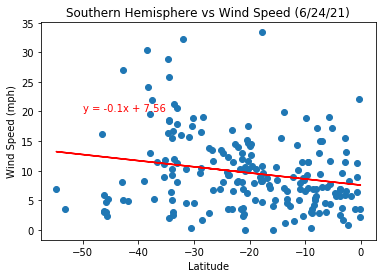

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi["Lat"],southern_hemi["Wind Speed"])
regress_values = southern_hemi["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemi["Lat"],southern_hemi["Wind Speed"] )
plt.plot(southern_hemi["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere vs Wind Speed")
plt.show()